In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [27]:
df = pd.read_csv('Data/raw.csv')

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,master's degree,standard,none,62,70,75
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83
2,female,group D,some college,free/reduced,none,79,89,86
3,male,group C,master's degree,free/reduced,none,61,67,66
4,male,group E,high school,standard,none,73,64,57


In [29]:
df.shape

(800, 8)

In [30]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       800 non-null    object
 1   race_ethnicity               800 non-null    object
 2   parental_level_of_education  800 non-null    object
 3   lunch                        800 non-null    object
 4   test_preparation_course      800 non-null    object
 5   math_score                   800 non-null    int64 
 6   reading_score                800 non-null    int64 
 7   writing_score                800 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 50.1+ KB


In [33]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     77
reading_score                  69
writing_score                  71
dtype: int64

In [34]:
df.describe()

,math_score,reading_score,writing_score
count,800.000000,800.000000,800.000000
mean,66.496250,69.555000,68.456250
std,15.024302,14.461532,15.085342
min,8.000000,24.000000,15.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [35]:
print("categories in 'gender' variable:  ",end=" ")
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("categories in 'parental level of education' variable:  ",end=" ")
print(df['parental_level_of_education'].unique())

print("categories in 'test preparation course' variable:  ",end=" ")
print(df['test_preparation_course'].unique())

categories in 'gender' variable:   ['female' 'male']
categories in 'race_ethnicity' variable:   ['group D' 'group C' 'group E' 'group B' 'group A']
categories in 'parental level of education' variable:   ["master's degree" "bachelor's degree" 'some college' 'high school'
 "associate's degree" 'some high school']
categories in 'test preparation course' variable:   ['none' 'completed']


In [36]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical features : {}".format(len(numeric_features), numeric_features))
print("\nwe have {} categorical features : {}".format(len(categorical_features), categorical_features))

we have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

we have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [37]:
df['Total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['Total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score,average
0,female,group D,master's degree,standard,none,62,70,75,207,69.000000
1,female,group C,bachelor's degree,free/reduced,completed,66,83,83,232,77.333333
2,female,group D,some college,free/reduced,none,79,89,86,254,84.666667
3,male,group C,master's degree,free/reduced,none,61,67,66,194,64.666667
4,male,group E,high school,standard,none,73,64,57,194,64.666667


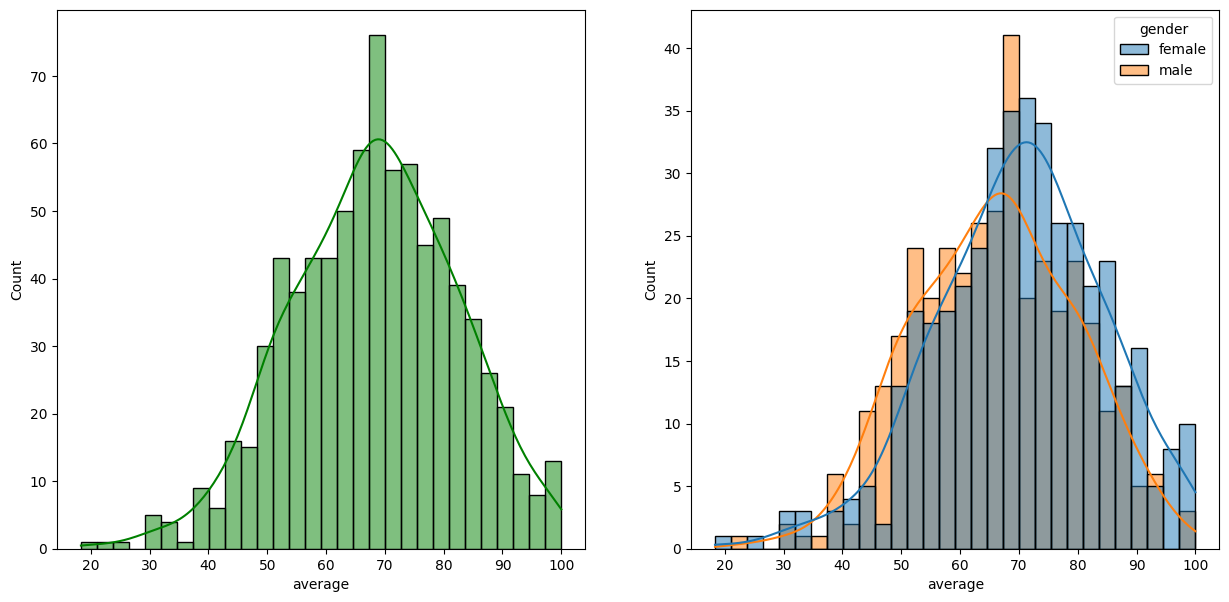

In [38]:
fig, axs=plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data = df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data = df, x='average', bins=30, kde=True, hue='gender')
plt.show()